<a href="https://colab.research.google.com/github/sireeshamachiraju17/DataScience/blob/master/Diabeties_Prediction_ML_Sireesha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problem Statement**

Medical condition of several patients is available. Suppose that in our role as Data Scientist we are asked to suggest.

We want to find the medical conditions that contribute to the probability of a person being Diabetic.

Visualize the relationship between the medical condition and other factors and their relation to being diabetic using scatter plots.

# **2 . Data Loading and Description**`

The diabeties dataset captures patients information generated with respect to their health condition 

Pregnancies- Number of pregnancies a person had

Glucose	- Current glucose level

BloodPressure	- The blood pressure of the patient 

SkinThickness	- Thickness of the skin 

Insulin	- Insulin levels 

BMI	- Body mass index of the patient 

DiabetesPedigreeFunction	

Age	- Age of the patient

Outcome- Indicates if a patient is disbetic or not
 


# **3. Importing the required packages**




In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# **4. Importing the Dataset**

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23873 bytes


# **5. Data files upload to Colab**

In [0]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**What are the contributing features?**

Pregnancies 

Glucose

Blood Pressure

Skin thickness

Insulin

BMI

DiabetiesPedigreeFunction

Age 

**What is the response?**

Outcome : Indicating if a patient is a diabetic person or not

# **6. Exploratory Data Analysis**



In [0]:
diabetes_data.info(verbose= True)
diabetes_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [0]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. 

The columns have a minimum value of 'Zero' indicating NAN Values

1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

In [0]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [0]:
## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [0]:
To fill these Nan values the data distribution needs to be understood

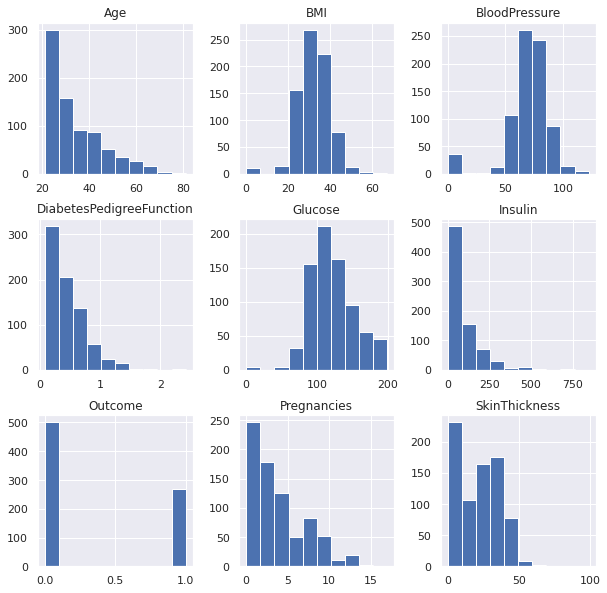

In [0]:
p = diabetes_data.hist(figsize = (10,10))

In [0]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

Replacing nan values for the columns in accordance with their distribution


Plotting after NaN removal

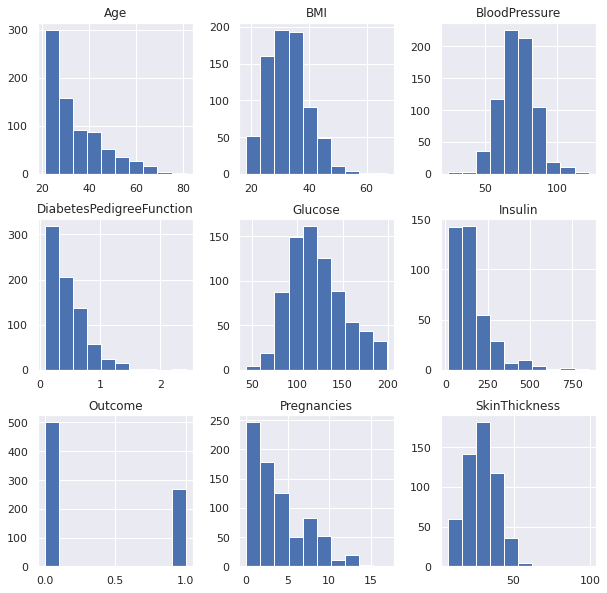

In [0]:
p = diabetes_data_copy.hist(figsize = (10,10))

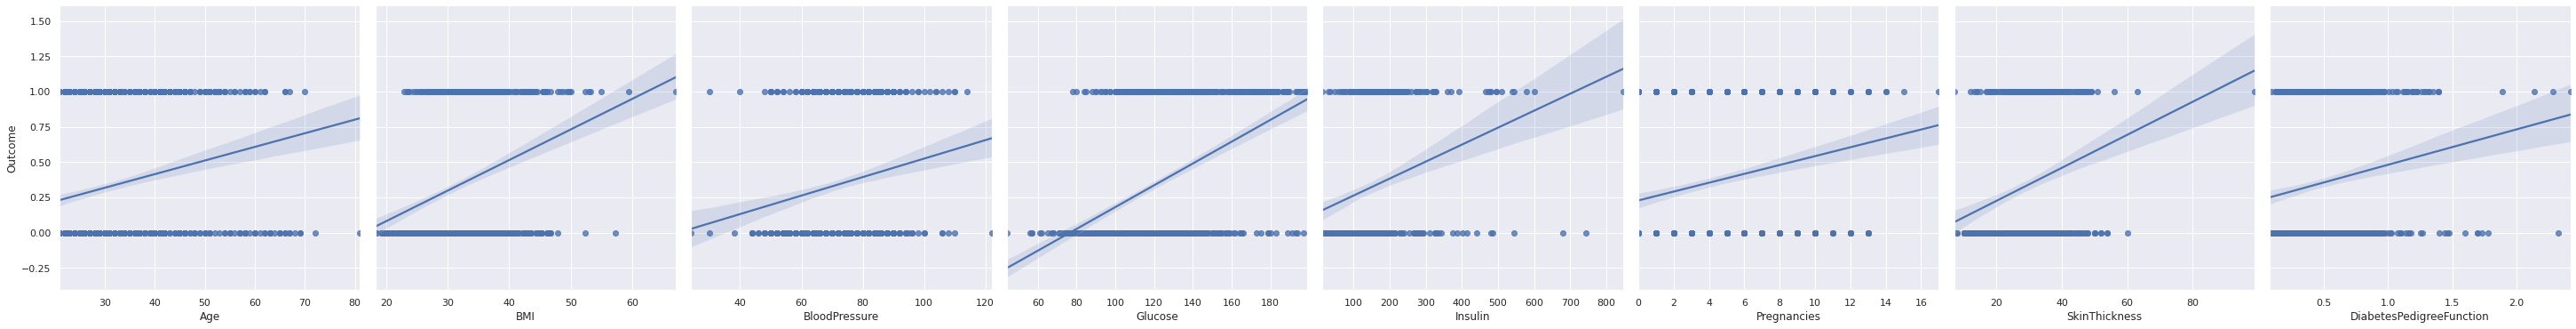

In [0]:
sns.pairplot(diabetes_data_copy, x_vars=['Age', 'BMI', 'BloodPressure','Glucose','Insulin','Pregnancies', 'SkinThickness', 'DiabetesPedigreeFunction'], y_vars='Outcome', size=5, aspect=1, kind='reg')

In [0]:
The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

In [0]:
diabetes_data_copy.corr()
# only works on numerical cont

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


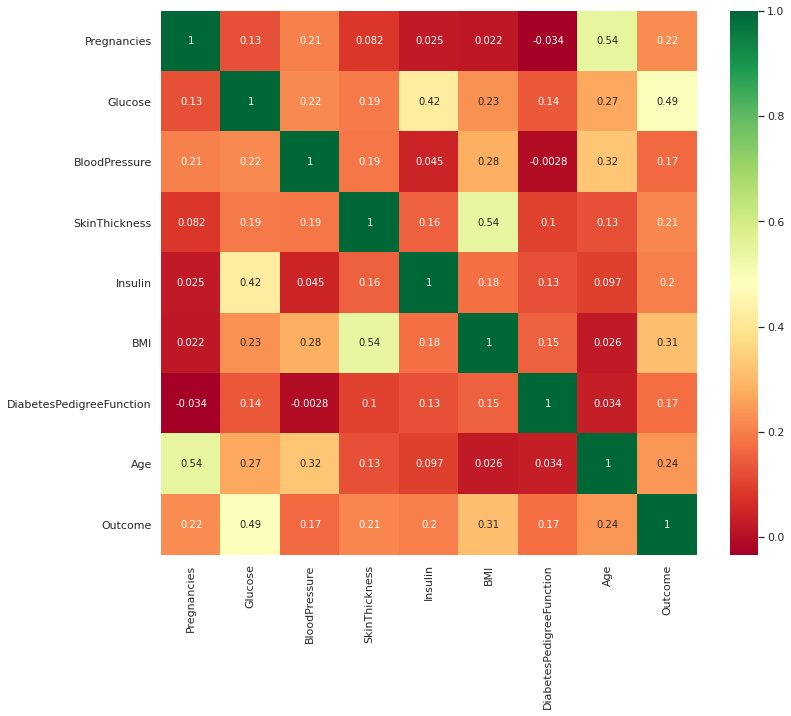

In [0]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn') 

**Observation**

The diagonal of the above matrix shows the auto-correlation of the variables. It is always 1. We can observe that the correlation between Glucose and Outcome is highest i.e. 0.49 and then between BMI and outcome i.e. 0.31.

correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probably candidates for model builing.

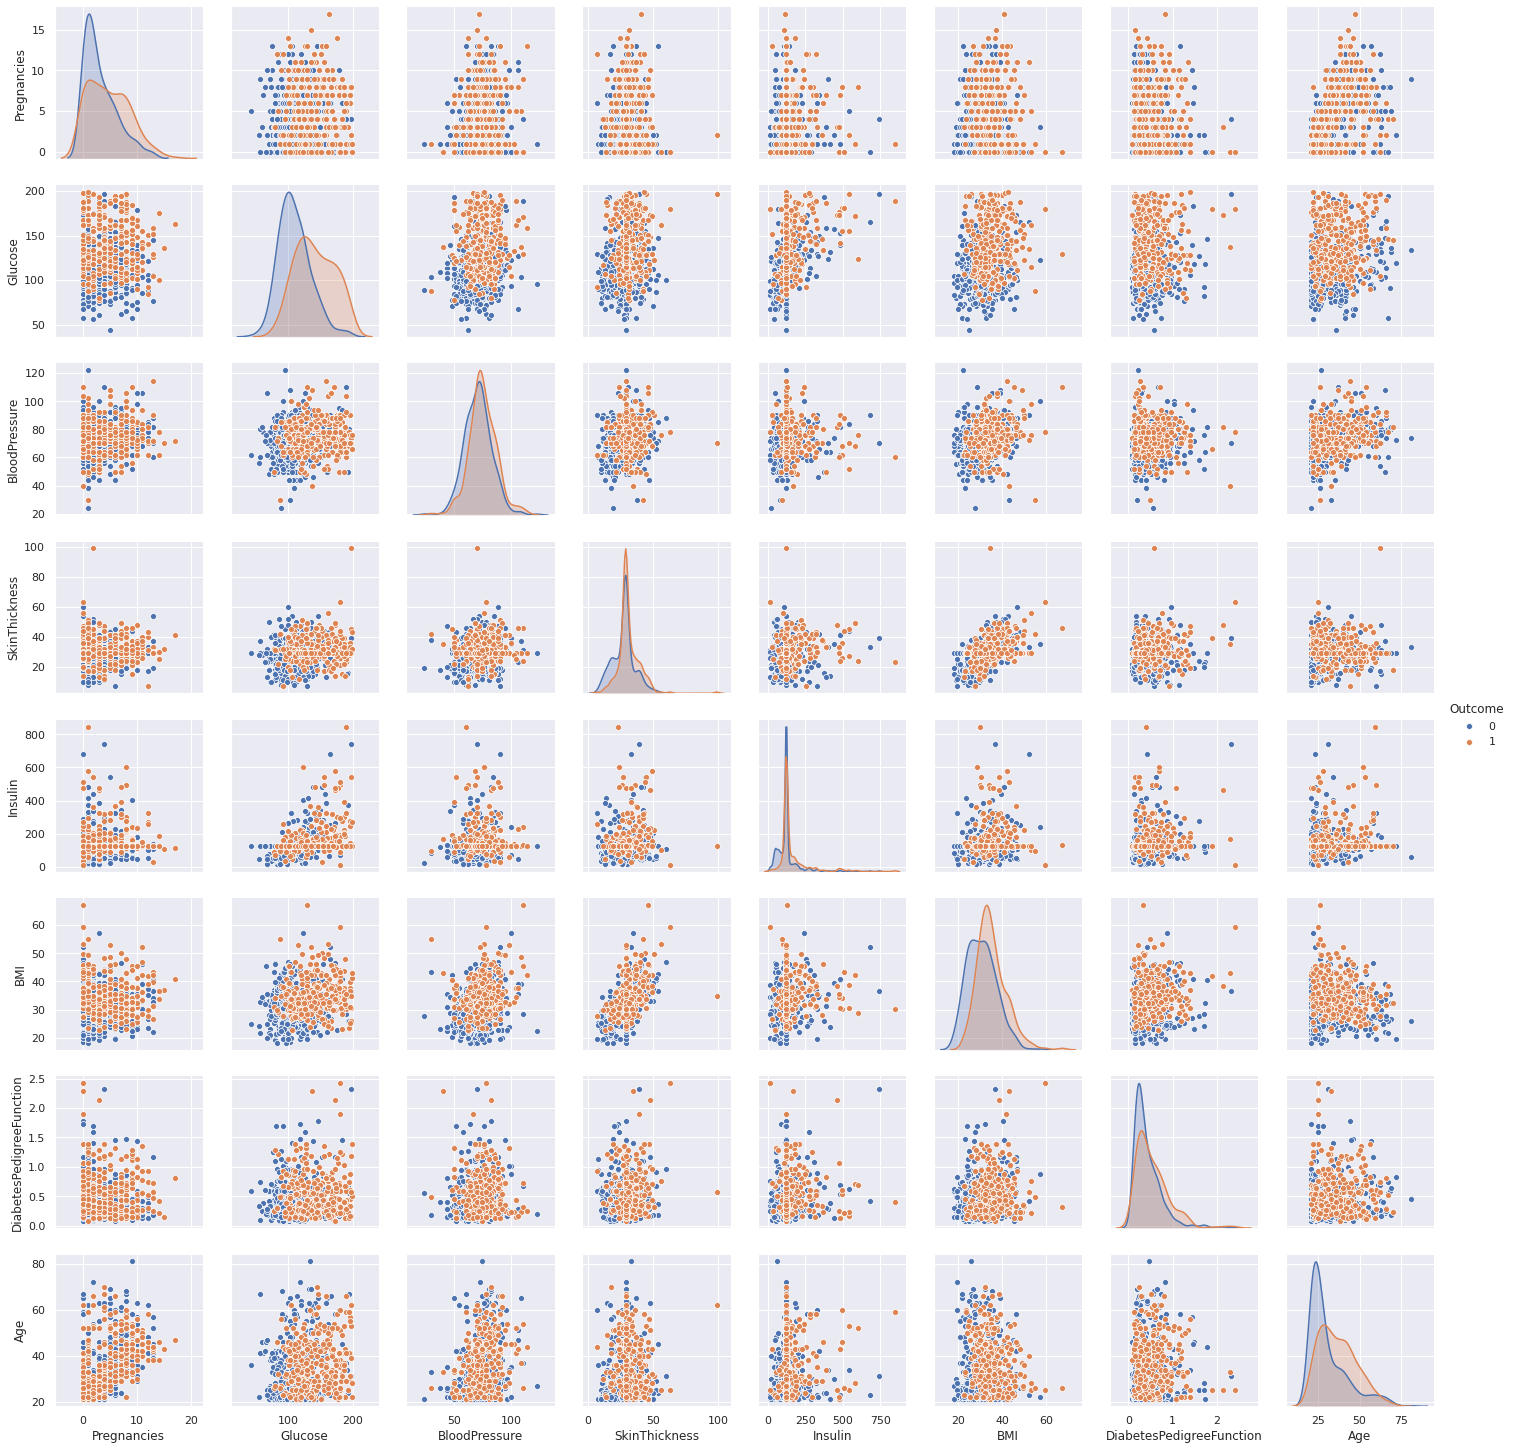

In [0]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

# **7. Create Models for prediction and evaluate them**

### **7a. Logistic regression**


I have considered Logistic regression since that we are predicting for a Binary output if a patient will be diabetic or not based on the health condition he has

**Creating X and y data set**


In [0]:
X = diabetes_data_copy.loc[:,diabetes_data_copy.columns != 'Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [0]:
y = diabetes_data_copy.Outcome 

**Splitting X and y in to train and test datasets**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [0]:
print(X_train.shape)
print(y_train.shape)

(614, 8)
(614,)


The below steps will be performed now-

Load the algorithm

Instantiate and Fit the model to the training dataset

Prediction on the test set

Calculating the accuracy of the model

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() # this is base model, because no parameters 
logreg.fit(X_train,y_train) # It trains the model on Train Data 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), 
      "penalty":["l1","l2"], 
      "tol":[0.01,0.001,0.0001]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'tol': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'tol': 0.01}
accuracy : 0.7671866737176097


In [0]:
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'tol': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Using the model for prediction**


In [0]:
logreg.fit(X_train,y_train)
y_pred_train = logreg.predict(X_train)
logreg.predict_proba(X_train)[0]   
y_pred_test = logreg.predict(X_test)                                         

In [0]:
len(y_test)

154

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.7727272727272727


In [0]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: Outcome, Length: 154, dtype: int64

In [0]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

**Model Evaluation using Confusion Matrix**

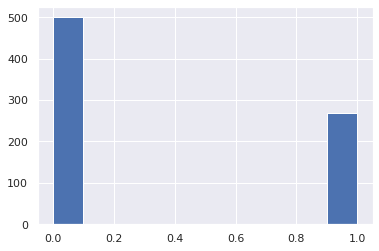

In [0]:
diabetes_data_copy['Outcome'].hist()

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

    0   1
0  87  12
1  23  32


In [0]:
confusion_matrix.index = ['Non Diabetic','Diabetic']
confusion_matrix.columns = ['Non Diabetic','Diabetic']
print(confusion_matrix)

              Non Diabetic  Diabetic
Non Diabetic            87        12
Diabetic                23        32


This means the model has made 87+32= 119 correct predictions and 23+12 = 45 Incorrect Predictions

In [0]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.7272727272727273


In [0]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))

Accuracy score for test data is: 0.7337662337662337


### **7b. *Random* Forest Classification**

In [0]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 0)

In [0]:
model1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
model2=logreg.fit(X_train,y_train)

### **7c. Decision Tree**

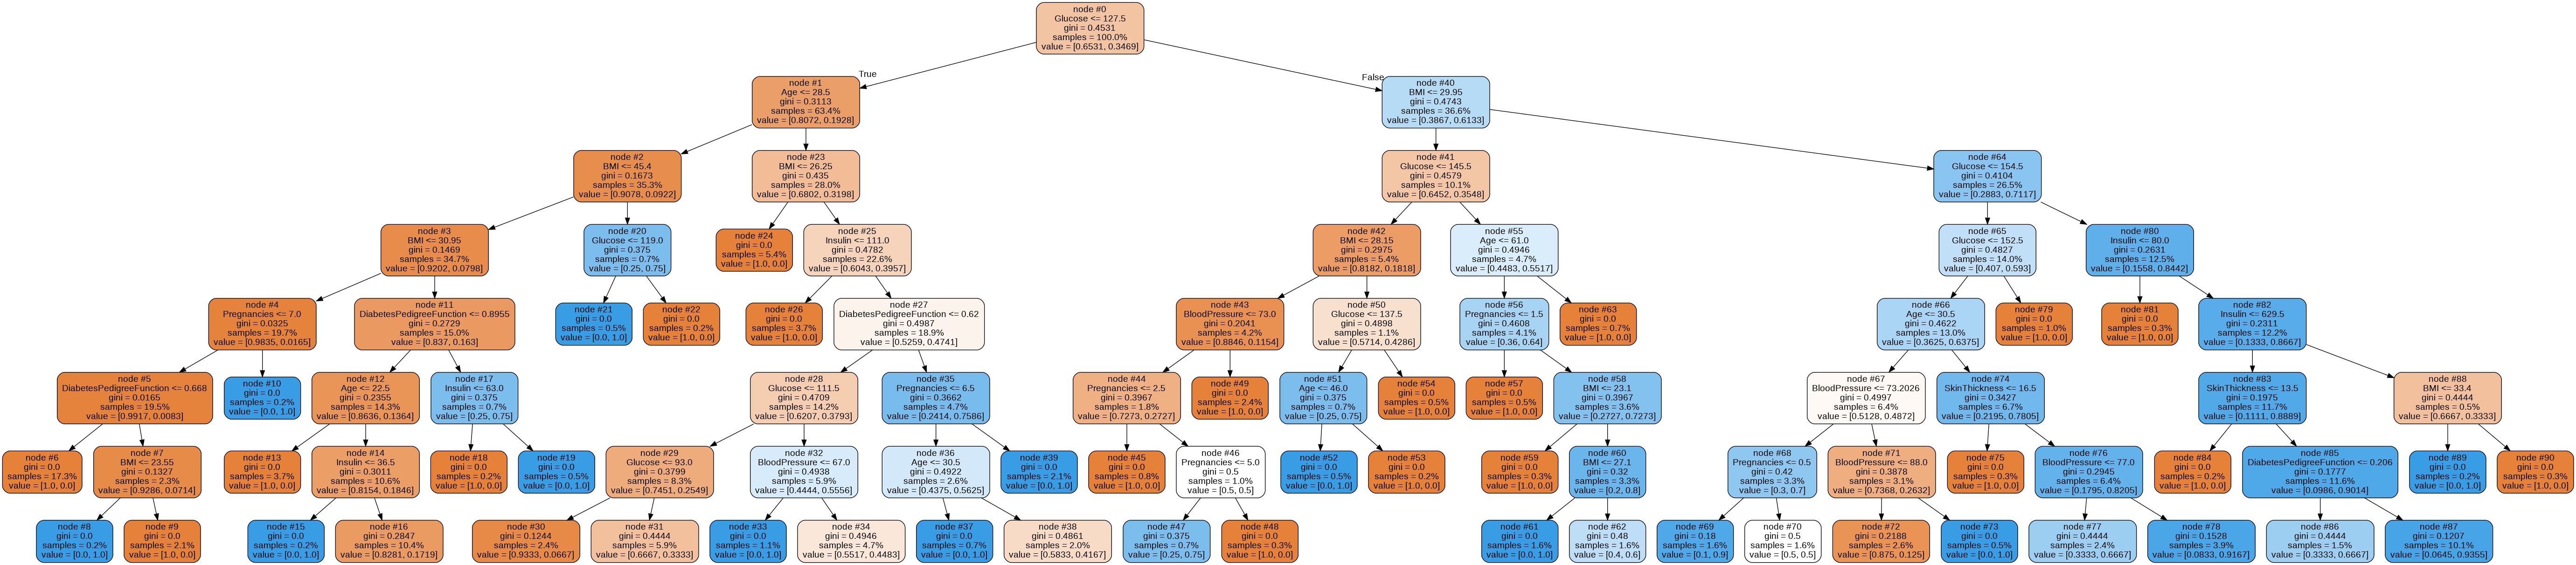

In [0]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier( criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
model3.fit(X_train, y_train)

#random state is a seed to start finding something randomly
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

export_graphviz(model3, 
                out_file='decision_tree.dot',
                feature_names= X.columns, 
                rounded=True, 
                precision=4, 
                node_ids=True, 
                proportion=True,
                filled=True)

(graph,) = pydot.graph_from_dot_file('decision_tree.dot')
graph.write_png('decision_tree.png')

Image(filename='decision_tree.png') 

Decision tree classifier- Gridsearch CV

>(Createdf for my reference, not used for evaluation in the forth coming blocks of code)




In [0]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import GridSearchCV
#model4 = DecisionTreeClassifier(random_state = 0)
#tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
#                             'max_features': ['sqrt', 'log2', None] }]
                        
                            

#grid_search = GridSearchCV(model4 ,tree_para, cv=10, refit='AUC')
#grid_search.fit(X_train, y_train)
#model4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
#y_pred_train4 = model4.predict(X_train) 
#y_pred_test4 = model4.predict(X_test) 

**Using models for Prediction**


In [0]:
prediction1_test = model1.predict(X_test)
prediction1_train = model1.predict(X_train) 

In [0]:
prediction2_test = model2.predict(X_test)
prediction2_train = model2.predict(X_train) 

prediction3_test = model3.predict(X_test)
prediction3_train = model3.predict(X_train) 


### **8. Calculating the accuracy score of the Models created**




In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with model 1 - Random Forest is:',accuracy_score(y_test, prediction1_test))
print('Accuracy score for test data with model 2 -Logistic Regression is:',accuracy_score(y_test, prediction2_test))
print('Accuracy score for test data with model 3 -Decision Tree is:',accuracy_score(y_test, prediction3_test))

Accuracy score for test data with model 1 - Random Forest is: 0.7987012987012987
Accuracy score for test data with model 2 -Logistic Regression is: 0.7727272727272727
Accuracy score for test data with model 3 -Decision Tree is: 0.7077922077922078


#### **8a . Confusion Matrix**


In [0]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with Random Forest model is:\n',confusion_matrix(y_test, prediction1_test))
print('Confusion matrix for test data with Logistic Regression is:\n',confusion_matrix(y_test, prediction2_test))
print('Confusion matrix for test data with Decision Trees is:\n',confusion_matrix(y_test, prediction3_test))


Confusion matrix for test data with Random Forest model is:
 [[86 13]
 [18 37]]
Confusion matrix for test data with Logistic Regression is:
 [[87 12]
 [23 32]]
Confusion matrix for test data with Decision Trees is:
 [[79 20]
 [25 30]]


#### **8b . Model evaluation using Precision score**


In [0]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,prediction1_test)
print('Precision score for test data using Random Forest is:', precision1)
precision2 = precision_score(y_test,prediction2_test)
print('Precision score for test data using Logistic Regression is:', precision2)
precision3 = precision_score(y_test,prediction3_test)
print('Precision score for test data using Decision Tree is:', precision3)


Precision score for test data using Random Forest is: 0.74
Precision score for test data using Logistic Regression is: 0.7272727272727273
Precision score for test data using Decision Tree is: 0.6


#### **8c . Model evaluation using F1 score**

In [0]:
from sklearn.metrics import f1_score
print('F1_score for test data using Random Forest is       :',f1_score(y_test, prediction1_test))
print('F1_score for test data using Logistic Regression is :',f1_score(y_test, prediction2_test))
print('F1_score for test data using Decision Trees is      :',f1_score(y_test, prediction3_test))


F1_score for test data using Random Forest is       : 0.7047619047619048
F1_score for test data using Logistic Regression is : 0.6464646464646464
F1_score for test data using Decision Trees is      : 0.5714285714285713


#### **8d . Model evaluation using AUC ROC curve**

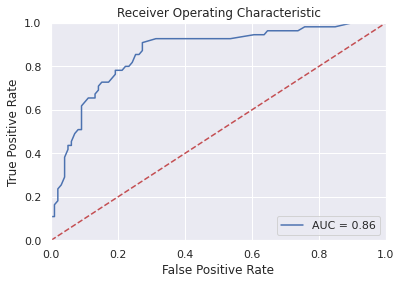

In [0]:
from sklearn import metrics
probs = model1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

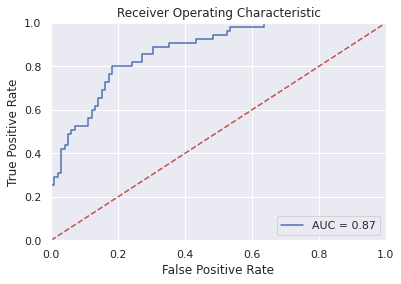

In [0]:
from sklearn import metrics
probs = model2.predict_proba(X_test)
pred = probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr1, tpr1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

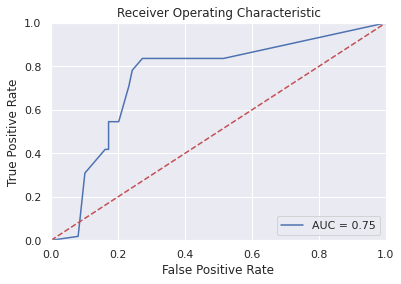

In [0]:
from sklearn import metrics
probs = model3.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### **9 . Conclusion**


*On evaluating the metrics , the models created for Logistic regression, Random forest and Decision trees - Random forest classifier has a better prediction model*